In [1]:
# If in Colab, then import the drive module from google.colab
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  # Mount the Google Drive to access files stored there
  drive.mount('/content/drive')

  # Install the latest version of torchtext library quietly without showing output

  !pip install torchinfo -qq

  basepath = '/content/drive/MyDrive/Colab Notebooks'

Mounted at /content/drive


In [2]:
import pandas as pd


df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ACSDP1Y2023.DP02-Data.csv')
# Load dataset from Excel file
#df = pd.read_csv("ACSDP1Y2023.DP02-Data.csv") # Replace "dp02_data.xlsx" with your Excel file name

# Select relevant columns
df_edu = df[["GEO_ID", "NAME", "DP02_0066PE"]]

# Sort by % high school or higher
df_edu_sorted = df_edu.sort_values(by="DP02_0066PE", ascending=False)

# Add rank
df_edu_sorted["Rank"] = df_edu_sorted["DP02_0066PE"].rank(ascending=False)

# Print the top 5 rows
print(df_edu_sorted.head(10))

             GEO_ID                                               NAME  \
0         Geography                               Geographic Area Name   
300  310M700US40420                            Rockford, IL Metro Area   
201  310M700US29820  Las Vegas-Henderson-North Las Vegas, NV Metro ...   
238  310M700US33660                              Mobile, AL Metro Area   
223  310M700US31860                             Mankato, MN Metro Area   
162  310M700US26580            Huntington-Ashland, WV-KY-OH Metro Area   
329  310M700US42700                             Sebring, FL Metro Area   
54   310M700US15500                          Burlington, NC Metro Area   
204  310M700US30140                             Lebanon, PA Metro Area   
365  310M700US46700                             Vallejo, CA Metro Area   

                                           DP02_0066PE  Rank  
0    Percent!!EDUCATIONAL ATTAINMENT!!Population 25...   1.0  
300                                                9.9   2.

In [3]:
# Print the top 5 rows
print(df_edu_sorted.head(10))

             GEO_ID                                               NAME  \
0         Geography                               Geographic Area Name   
300  310M700US40420                            Rockford, IL Metro Area   
201  310M700US29820  Las Vegas-Henderson-North Las Vegas, NV Metro ...   
238  310M700US33660                              Mobile, AL Metro Area   
223  310M700US31860                             Mankato, MN Metro Area   
162  310M700US26580            Huntington-Ashland, WV-KY-OH Metro Area   
329  310M700US42700                             Sebring, FL Metro Area   
54   310M700US15500                          Burlington, NC Metro Area   
204  310M700US30140                             Lebanon, PA Metro Area   
365  310M700US46700                             Vallejo, CA Metro Area   

                                           DP02_0066PE  Rank  
0    Percent!!EDUCATIONAL ATTAINMENT!!Population 25...   1.0  
300                                                9.9   2.

In [4]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ACSDP1Y2023.DP05-Data.csv')

# Select relevant columns
df_pop = df[["GEO_ID", "NAME", "DP05_0001E"]]

# Sort by % high school or higher
df_pop_sorted = df_pop.sort_values(by="DP05_0001E", ascending=False)

# Add rank
#df_edu_sorted["Rank"] = df_edu_sorted["DP02_0066PE"].rank(ascending=False)

# Print the top 5 rows
print(df_pop_sorted.head(10))

             GEO_ID                                      NAME  \
0         Geography                      Geographic Area Name   
366  310M700US47020                   Victoria, TX Metro Area   
159  310M700US26300                Hot Springs, AR Metro Area   
362  310M700US46520             Urban Honolulu, HI Metro Area   
100  310M700US20220                    Dubuque, IA Metro Area   
263  310M700US36540                   Omaha, NE-IA Metro Area   
58   310M700US16020          Cape Girardeau, MO-IL Metro Area   
85   310M700US18700                  Corvallis, OR Metro Area   
144  310M700US24860  Greenville-Anderson-Greer, SC Metro Area   
253  310M700US35380       New Orleans-Metairie, LA Metro Area   

                                  DP05_0001E  
0    Estimate!!SEX AND AGE!!Total population  
366                                    99982  
159                                    99784  
362                                   989408  
100                                    98887  
26

In [5]:
# Remove any non-numeric values in population column
df_pop = df_pop[df_pop["DP05_0001E"].str.isnumeric()]

# Convert population column to integer
df_pop["DP05_0001E"] = df_pop["DP05_0001E"].astype(int)

# Sort by population in descending order
df_pop_sorted = df_pop.sort_values(by="DP05_0001E", ascending=False)

# Reset index
df_pop_sorted = df_pop_sorted.reset_index(drop=True)

# Print the top 10 rows
print(df_pop_sorted.head(10))

           GEO_ID                                               NAME  \
0  310M700US35620      New York-Newark-Jersey City, NY-NJ Metro Area   
1  310M700US31080      Los Angeles-Long Beach-Anaheim, CA Metro Area   
2  310M700US16980         Chicago-Naperville-Elgin, IL-IN Metro Area   
3  310M700US19100         Dallas-Fort Worth-Arlington, TX Metro Area   
4  310M700US26420      Houston-Pasadena-The Woodlands, TX Metro Area   
5  310M700US12060       Atlanta-Sandy Springs-Roswell, GA Metro Area   
6  310M700US47900  Washington-Arlington-Alexandria, DC-VA-MD-WV M...   
7  310M700US37980  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Me...   
8  310M700US33100  Miami-Fort Lauderdale-West Palm Beach, FL Metr...   
9  310M700US38060               Phoenix-Mesa-Chandler, AZ Metro Area   

   DP05_0001E  
0    19498249  
1    12799100  
2     9262559  
3     8100037  
4     7510252  
5     6305839  
6     6304449  
7     6246160  
8     6183199  
9     5070110  


<ipython-input-5-da7e76cc7130>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop["DP05_0001E"] = df_pop["DP05_0001E"].astype(int)


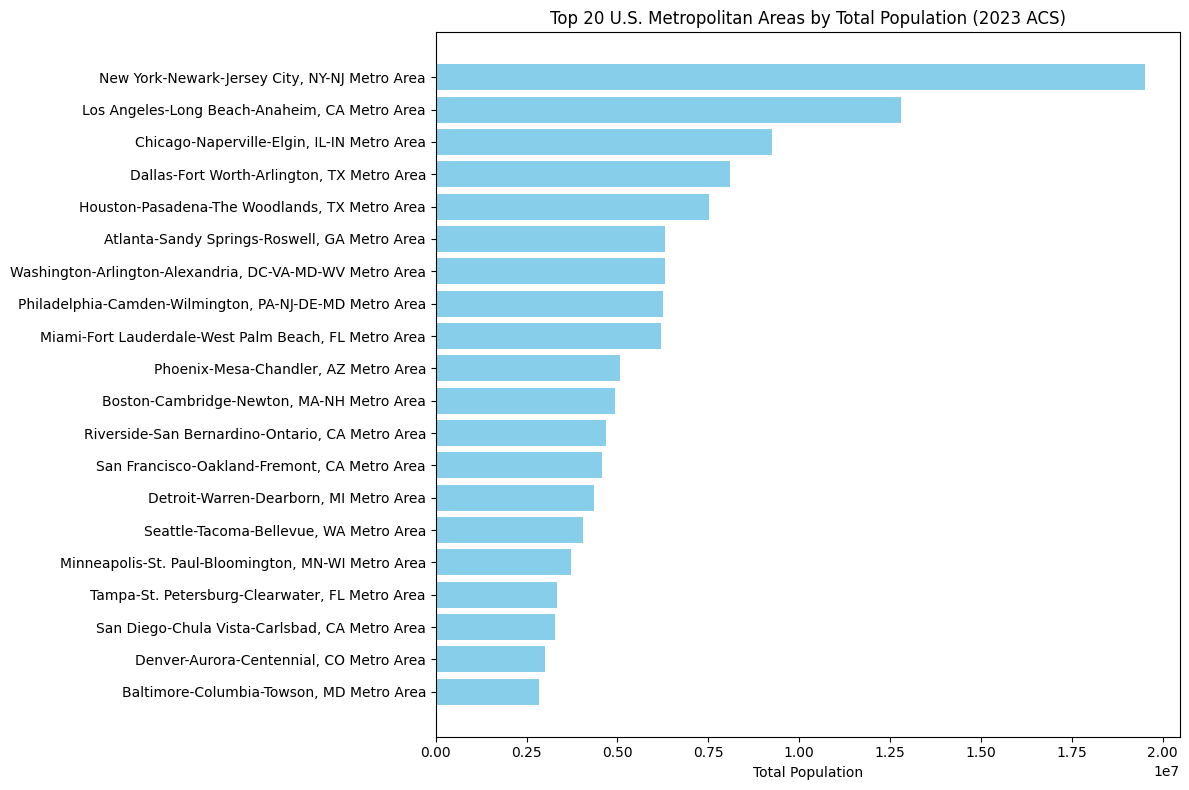

In [6]:
import pandas as pd

import matplotlib.pyplot as plt

# Load the dataset

file_path = "/content/drive/MyDrive/Colab Notebooks/ACSDP1Y2023.DP05-Data.csv"  # Update path if needed

df = pd.read_csv(file_path)

# Remove the descriptive header row

df_clean = df[1:].copy()

# Select relevant columns

columns_to_use = ["NAME", "DP05_0001E", 'DP05_0018E', 'DP05_0010E', 'DP05_0076PE', 'DP05_0092E', 'DP05_0091E']

# Convert columns to numeric (except 'NAME')

df_clean[columns_to_use[1:]] = df_clean[columns_to_use[1:]].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing population data

df_clean = df_clean.dropna(subset=["DP05_0001E"])

# Sort by total population and get top 20

top20 = df_clean.sort_values(by="DP05_0001E", ascending=False).head(20)

# Plotting

plt.figure(figsize=(12, 8))

plt.barh(top20["NAME"], top20["DP05_0001E"], color='skyblue')

plt.xlabel("Total Population")

plt.title("Top 20 U.S. Metropolitan Areas by Total Population (2023 ACS)")

plt.gca().invert_yaxis()  # Highest on top

plt.tight_layout()

plt.show()



In [7]:
top20 = df_clean.sort_values(by="DP05_0001E", ascending=False).head(20)


In [ ]:
top20['NAME']

,NAME
254,"New York-Newark-Jersey City, NY-NJ Metro Area"
215,"Los Angeles-Long Beach-Anaheim, CA Metro Area"
70,"Chicago-Naperville-Elgin, IL-IN Metro Area"
87,"Dallas-Fort Worth-Arlington, TX Metro Area"
161,"Houston-Pasadena-The Woodlands, TX Metro Area"
21,"Atlanta-Sandy Springs-Roswell, GA Metro Area"
373,"Washington-Arlington-Alexandria, DC-VA-MD-WV M..."
274,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Me..."
230,"Miami-Fort Lauderdale-West Palm Beach, FL Metr..."
275,"Phoenix-Mesa-Chandler, AZ Metro Area"


In [8]:
pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 62.8 MB/s eta 0:00:00


In [10]:
# import math
# import pandas as pd

# from pulp import LpMinimize, LpProblem, LpVariable, lpSum

# # Step 1: Define Updated Mill Coordinates and Data
# mills = {
#     "Atlanta-Sandy Springs-Roswell, GA": (33.7490, -84.3880, 0.659275),  # (lat, lon, composite score)
#     "Portland-Vancouver-Hillsboro, OR-WA": (45.5152, -122.6784, 0.527160),
#     "Jackson, MS": (32.2988, -90.1848, 0.524247)
# }

# metros = {
#     "New York-Newark-Jersey City, NY-NJ": (40.7128, -74.0060, 8398748),  # (lat, lon, population)
#     "Los Angeles-Long Beach-Anaheim, CA": (34.0522, -118.2437, 12400744),
#     "Chicago-Naperville-Elgin, IL-IN": (41.8781, -87.6298, 9618502),
#     "Dallas-Fort Worth-Arlington, TX": (32.7767, -96.7970, 6426214),
#     "Houston-Pasadena-The Woodlands, TX": (29.7604, -95.3698, 5981475),
#     "Atlanta-Sandy Springs-Roswell, GA": (33.7490, -84.3880, 5408286),
#     "Washington-Arlington-Alexandria, DC-VA-MD-WV": (38.9072, -77.0369, 5636396),
#     "Philadelphia-Camden-Wilmington, PA-NJ-DE-MD": (39.9526, -75.1652, 6070500),
#     "Miami-Fort Lauderdale-West Palm Beach, FL": (25.7617, -80.1918, 6138333),
#     "Phoenix-Mesa-Chandler, AZ": (33.4484, -112.0740, 4203240),
#     "Boston-Cambridge-Newton, MA-NH": (42.3601, -71.0589, 4733126),
#     "Riverside-San Bernardino-Ontario, CA": (33.9806, -117.3755, 4081257),
#     "San Francisco-Oakland-Fremont, CA": (37.7749, -122.4194, 4657023),
#     "Detroit-Warren-Dearborn, MI": (42.3314, -83.0458, 4369135),
#     "Seattle-Tacoma-Bellevue, WA": (47.6062, -122.3321, 3680169),
#     "Minneapolis-St. Paul-Bloomington, MN-WI": (44.9778, -93.2650, 3520934),
#     "Tampa-St. Petersburg-Clearwater, FL": (27.9506, -82.4572, 2949560),
#     "San Diego-Chula Vista-Carlsbad, CA": (32.7157, -117.1611, 3296315),
#     "Denver-Aurora-Centennial, CO": (39.7392, -104.9903, 2829950),
#     "Baltimore-Columbia-Towson, MD": (39.2904, -76.6122, 2781443)
# }

# # Step 2: Haversine Distance Function
# def haversine(lat1, lon1, lat2, lon2):
#     R = 3959  # Earth's radius in miles
#     lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
#     dlat = lat2 - lat1
#     dlon = lon2 - lon1
#     a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
#     c = 2 * math.asin(math.sqrt(a))
#     return R * c

# # Step 3: Calculate Distance Matrix
# distances = {}
# for mill, (m_lat, m_lon, _) in mills.items():
#     distances[mill] = {}
#     for metro, (met_lat, met_lon, _) in metros.items():
#         distances[mill][metro] = haversine(m_lat, m_lon, met_lat, met_lon)

# # Step 4: Logistics Cost Parameters
# cost_per_mile = 2.0  # $2/mile (adjustable)
# trips_per_million_pop = 100  # 100 trips per million people (adjustable)

# # Step 5: Optimization with PuLP
# prob = LpProblem("Mill_Assignment", LpMinimize)

# # Decision variables: x[mill][metro] = 1 if metro assigned to mill, 0 otherwise
# x = {(mill, metro): LpVariable(f"x_{mill}_{metro}", 0, 1, cat="Binary")
#      for mill in mills for metro in metros}

# # Objective: Minimize total logistics cost (distance * cost/mile * demand)
# objective = lpSum(distances[mill][metro] * cost_per_mile * metros[metro][2] * trips_per_million_pop / 1e6
#                   * x[mill, metro]
#                   for mill in mills for metro in metros)
# prob += objective

# # Constraint 1: Each metro assigned to exactly one mill
# for metro in metros:
#     prob += lpSum(x[mill, metro] for mill in mills) == 1, f"Assign_{metro}"

# # Constraint 2: Optional capacity constraint (e.g., max population served per mill)
# # Example: Each mill serves max 20M population (adjust as needed)
# max_capacity = 20000000
# for mill in mills:
#     prob += lpSum(metros[metro][2] * x[mill, metro] for metro in metros) <= max_capacity, f"Capacity_{mill}"

# # Solve the problem
# prob.solve()

# # Step 6: Output Results
# print("Status:", prob.status)
# total_cost = 0
# assignments = {mill: [] for mill in mills}

# for mill in mills:
#     for metro in metros:
#         if x[mill, metro].varValue == 1:
#             distance = distances[mill][metro]
#             population = metros[metro][2]
#             cost = distance * cost_per_mile * population * trips_per_million_pop / 1e6
#             total_cost += cost
#             assignments[mill].append((metro, distance, cost))
#             print(f"{mill} serves {metro}: {distance:.0f} miles, Cost: ${cost:,.2f}")

# print(f"\nTotal Logistics Cost: ${total_cost:,.2f}")

# # Step 7: Summarize Assignments (with sorting by total mill cost)
# mill_costs = {}

# for mill, metros_assigned in assignments.items():
#     mill_total = sum(cost for _, _, cost in metros_assigned)
#     mill_costs[mill] = mill_total

# # Sort mills by total logistics cost (ascending)
# for mill in sorted(mill_costs, key=mill_costs.get):
#     print(f"\n{mill} (Score: {mills[mill][2]:.6f}) — Total Cost: ${mill_costs[mill]:,.2f}")
#     for metro, dist, cost in sorted(assignments[mill], key=lambda x: x[2]):  # Sort metros by cost
#         print(f"  - {metro}: {dist:.0f} miles, ${cost:,.2f}")

Status: -1
Atlanta-Sandy Springs-Roswell, GA serves Atlanta-Sandy Springs-Roswell, GA: 0 miles, Cost: $0.00
Atlanta-Sandy Springs-Roswell, GA serves Washington-Arlington-Alexandria, DC-VA-MD-WV: 542 miles, Cost: $611,352.10
Atlanta-Sandy Springs-Roswell, GA serves Philadelphia-Camden-Wilmington, PA-NJ-DE-MD: 666 miles, Cost: $807,996.08
Portland-Vancouver-Hillsboro, OR-WA serves Los Angeles-Long Beach-Anaheim, CA: 826 miles, Cost: $2,048,542.40
Portland-Vancouver-Hillsboro, OR-WA serves Chicago-Naperville-Elgin, IL-IN: 1755 miles, Cost: $3,375,495.06
Portland-Vancouver-Hillsboro, OR-WA serves Dallas-Fort Worth-Arlington, TX: 1631 miles, Cost: $2,096,723.18
Portland-Vancouver-Hillsboro, OR-WA serves Phoenix-Mesa-Chandler, AZ: 1006 miles, Cost: $845,290.18
Portland-Vancouver-Hillsboro, OR-WA serves San Francisco-Oakland-Fremont, CA: 535 miles, Cost: $498,303.65
Portland-Vancouver-Hillsboro, OR-WA serves Detroit-Warren-Dearborn, MI: 1965 miles, Cost: $1,716,647.08
Jackson, MS serves Houst

In [11]:
import math
import pandas as pd
from pulp import LpMinimize, LpProblem, LpVariable, lpSum

# Step 1: Define Updated Mill Coordinates and Data
mills = {
    "Atlanta-Sandy Springs-Roswell, GA": (33.7490, -84.3880, 0.659275),  # (lat, lon, composite score)
    "Portland-Vancouver-Hillsboro, OR-WA": (45.5152, -122.6784, 0.527160),
    "Jackson, MS": (32.2988, -90.1848, 0.524247)
}

metros = {
    "New York-Newark-Jersey City, NY-NJ": (40.7128, -74.0060, 8398748),  # (lat, lon, population)
    "Los Angeles-Long Beach-Anaheim, CA": (34.0522, -118.2437, 12400744),
    "Chicago-Naperville-Elgin, IL-IN": (41.8781, -87.6298, 9618502),
    "Dallas-Fort Worth-Arlington, TX": (32.7767, -96.7970, 6426214),
    "Houston-Pasadena-The Woodlands, TX": (29.7604, -95.3698, 5981475),
    "Atlanta-Sandy Springs-Roswell, GA": (33.7490, -84.3880, 5408286),
    "Washington-Arlington-Alexandria, DC-VA-MD-WV": (38.9072, -77.0369, 5636396),
    "Philadelphia-Camden-Wilmington, PA-NJ-DE-MD": (39.9526, -75.1652, 6070500),
    "Miami-Fort Lauderdale-West Palm Beach, FL": (25.7617, -80.1918, 6138333),
    "Phoenix-Mesa-Chandler, AZ": (33.4484, -112.0740, 4203240),
    "Boston-Cambridge-Newton, MA-NH": (42.3601, -71.0589, 4733126),
    "Riverside-San Bernardino-Ontario, CA": (33.9806, -117.3755, 4081257),
    "San Francisco-Oakland-Fremont, CA": (37.7749, -122.4194, 4657023),
    "Detroit-Warren-Dearborn, MI": (42.3314, -83.0458, 4369135),
    "Seattle-Tacoma-Bellevue, WA": (47.6062, -122.3321, 3680169),
    "Minneapolis-St. Paul-Bloomington, MN-WI": (44.9778, -93.2650, 3520934),
    "Tampa-St. Petersburg-Clearwater, FL": (27.9506, -82.4572, 2949560),
    "San Diego-Chula Vista-Carlsbad, CA": (32.7157, -117.1611, 3296315),
    "Denver-Aurora-Centennial, CO": (39.7392, -104.9903, 2829950),
    "Baltimore-Columbia-Towson, MD": (39.2904, -76.6122, 2781443)
}

# Step 2: Haversine Distance Function
def haversine(lat1, lon1, lat2, lon2):
    R = 3959  # Earth's radius in miles
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    return R * c

# Step 3: Calculate Distance Matrix
distances = {}
for mill, (m_lat, m_lon, _) in mills.items():
    distances[mill] = {}
    for metro, (met_lat, met_lon, _) in metros.items():
        distances[mill][metro] = haversine(m_lat, m_lon, met_lat, met_lon)

# Step 4: Logistics Cost Parameters
cost_per_mile = 2.0  # $2/mile (adjustable)
trips_per_million_pop = 100  # 100 trips per million people (adjustable)

# Step 5: Optimization with PuLP
prob = LpProblem("Mill_Assignment", LpMinimize)

# Decision variables: x[mill][metro] = 1 if metro assigned to mill, 0 otherwise
x = {(mill, metro): LpVariable(f"x_{mill}_{metro}", 0, 1, cat="Binary")
     for mill in mills for metro in metros}

# Objective: Minimize total logistics cost (distance * cost/mile * demand)
objective = lpSum(distances[mill][metro] * cost_per_mile * metros[metro][2] * trips_per_million_pop / 1e6
                  * x[mill, metro]
                  for mill in mills for metro in metros)
prob += objective

# Constraint: Each metro assigned to exactly one mill
for metro in metros:
    prob += lpSum(x[mill, metro] for mill in mills) == 1, f"Assign_{metro}"

# Solve the problem
prob.solve()

# Step 6: Output Results
print("Status:", prob.status)
total_cost = 0
assignments = {mill: [] for mill in mills}

for mill in mills:
    for metro in metros:
        if x[mill, metro].varValue == 1:
            distance = distances[mill][metro]
            population = metros[metro][2]
            cost = distance * cost_per_mile * population * trips_per_million_pop / 1e6
            total_cost += cost
            assignments[mill].append((metro, distance, cost))
            print(f"{mill} serves {metro}: {distance:.0f} miles, Cost: ${cost:,.2f}")

print(f"\nTotal Logistics Cost: ${total_cost:,.2f}")

# Step 7: Summarize Assignments (with sorting by total mill cost)
mill_costs = {}
for mill, metros_assigned in assignments.items():
    mill_total = sum(cost for _, _, cost in metros_assigned)
    mill_costs[mill] = mill_total

# Sort mills by total logistics cost (ascending)
for mill in sorted(mill_costs, key=mill_costs.get):
    print(f"\n{mill} (Score: {mills[mill][2]:.6f}) — Total Cost: ${mill_costs[mill]:,.2f}")
    for metro, dist, cost in sorted(assignments[mill], key=lambda x: x[2]):  # Sort metros by cost
        print(f"  - {metro}: {dist:.0f} miles, ${cost:,.2f}")

Status: 1
Atlanta-Sandy Springs-Roswell, GA serves New York-Newark-Jersey City, NY-NJ: 746 miles, Cost: $1,252,905.53
Atlanta-Sandy Springs-Roswell, GA serves Chicago-Naperville-Elgin, IL-IN: 589 miles, Cost: $1,132,654.87
Atlanta-Sandy Springs-Roswell, GA serves Atlanta-Sandy Springs-Roswell, GA: 0 miles, Cost: $0.00
Atlanta-Sandy Springs-Roswell, GA serves Washington-Arlington-Alexandria, DC-VA-MD-WV: 542 miles, Cost: $611,352.10
Atlanta-Sandy Springs-Roswell, GA serves Philadelphia-Camden-Wilmington, PA-NJ-DE-MD: 666 miles, Cost: $807,996.08
Atlanta-Sandy Springs-Roswell, GA serves Miami-Fort Lauderdale-West Palm Beach, FL: 606 miles, Cost: $744,485.25
Atlanta-Sandy Springs-Roswell, GA serves Boston-Cambridge-Newton, MA-NH: 936 miles, Cost: $886,126.47
Atlanta-Sandy Springs-Roswell, GA serves Detroit-Warren-Dearborn, MI: 597 miles, Cost: $522,094.74
Atlanta-Sandy Springs-Roswell, GA serves Tampa-St. Petersburg-Clearwater, FL: 417 miles, Cost: $245,803.03
Atlanta-Sandy Springs-Roswel

In [17]:
import osmnx as ox
print(ox.__version__)

2.0.2


In [38]:
import math
import pandas as pd
import numpy as np
import requests
import time
from pulp import LpMinimize, LpProblem, LpVariable, lpSum

# Step 1: Define Updated Mill Coordinates and Data
mills = {
    "Atlanta-Sandy Springs-Roswell, GA": (33.7490, -84.3880, 0.659275),  # (lat, lon, composite score)
    "Portland-Vancouver-Hillsboro, OR-WA": (45.5152, -122.6784, 0.527160),
    "Jackson, MS": (32.2988, -90.1848, 0.524247)
}

metros = {
    "New York-Newark-Jersey City, NY-NJ": (40.7128, -74.0060, 8398748),  # (lat, lon, population)
    "Los Angeles-Long Beach-Anaheim, CA": (34.0522, -118.2437, 12400744),
    "Chicago-Naperville-Elgin, IL-IN": (41.8781, -87.6298, 9618502),
    "Dallas-Fort Worth-Arlington, TX": (32.7767, -96.7970, 6426214),
    "Houston-Pasadena-The Woodlands, TX": (29.7604, -95.3698, 5981475),
    "Atlanta-Sandy Springs-Roswell, GA": (33.7490, -84.3880, 5408286),
    "Washington-Arlington-Alexandria, DC-VA-MD-WV": (38.9072, -77.0369, 5636396),
    "Philadelphia-Camden-Wilmington, PA-NJ-DE-MD": (39.9526, -75.1652, 6070500),
    "Miami-Fort Lauderdale-West Palm Beach, FL": (25.7617, -80.1918, 6138333),
    "Phoenix-Mesa-Chandler, AZ": (33.4484, -112.0740, 4203240),
    "Boston-Cambridge-Newton, MA-NH": (42.3601, -71.0589, 4733126),
    "Riverside-San Bernardino-Ontario, CA": (33.9806, -117.3755, 4081257),
    "San Francisco-Oakland-Fremont, CA": (37.7749, -122.4194, 4657023),
    "Detroit-Warren-Dearborn, MI": (42.3314, -83.0458, 4369135),
    "Seattle-Tacoma-Bellevue, WA": (47.6062, -122.3321, 3680169),
    "Minneapolis-St. Paul-Bloomington, MN-WI": (44.9778, -93.2650, 3520934),
    "Tampa-St. Petersburg-Clearwater, FL": (27.9506, -82.4572, 2949560),
    "San Diego-Chula Vista-Carlsbad, CA": (32.7157, -117.1611, 3296315),
    "Denver-Aurora-Centennial, CO": (39.7392, -104.9903, 2829950),
    "Baltimore-Columbia-Towson, MD": (39.2904, -76.6122, 2781443)
}

# Step 2: Enhanced Distance and Time Calculation

# Option 1: Use OSRM API for realistic driving routes if API key available
# This function would use OpenStreetMap Routing Machine (OSRM) API
def get_driving_data_osrm(lat1, lon1, lat2, lon2):
    try:
        url = f"http://router.project-osrm.org/route/v1/driving/{lon1},{lat1};{lon2},{lat2}?overview=false"
        response = requests.get(url)
        data = response.json()

        if data["code"] == "Ok":
            route = data["routes"][0]
            distance_meters = route["distance"]  # in meters
            duration_seconds = route["duration"]  # in seconds

            distance_miles = distance_meters / 1609.34
            duration_hours = duration_seconds / 3600

            return distance_miles, duration_hours
        else:
            # Fall back to haversine + time estimate if API fails
            return fallback_distance_time(lat1, lon1, lat2, lon2)
    except:
        # Fall back to haversine + time estimate if API fails
        return fallback_distance_time(lat1, lon1, lat2, lon2)

# Fallback method using haversine distance with speed estimation
def fallback_distance_time(lat1, lon1, lat2, lon2):
    # Haversine distance calculation
    R = 3959  # Earth's radius in miles
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    distance = R * c

    # Estimated speed model based on distance
    # For longer routes, average speed increases
    if distance < 50:
        avg_speed = 45  # mph for short trips (urban/suburban)
    elif distance < 200:
        avg_speed = 55  # mph for medium trips (mix of highway/local)
    else:
        avg_speed = 65  # mph for long trips (mostly highway)

    # Additional time for rest stops on very long routes
    if distance > 500:
        rest_hours = (distance // 500) * 0.5  # 30 min rest every 500 miles
    else:
        rest_hours = 0

    # Add traffic congestion factor based on metro size
    # This could be refined further with actual traffic data
    time_hours = distance / avg_speed + rest_hours

    return distance, time_hours

# Step 3: Calculate Distance and Time Matrix
distances = {}
times = {}
use_api = False  # Set to True if you want to use OSRM API

for mill, (m_lat, m_lon, _) in mills.items():
    distances[mill] = {}
    times[mill] = {}
    for metro, (met_lat, met_lon, _) in metros.items():
        if use_api:
            dist, time_hrs = get_driving_data_osrm(m_lat, m_lon, met_lat, met_lon)
            # Add small delay to avoid rate limiting
            time.sleep(0.2)
        else:
            dist, time_hrs = fallback_distance_time(m_lat, m_lon, met_lat, met_lon)

        distances[mill][metro] = dist
        times[mill][metro] = time_hrs

# Step 4: Enhanced Logistics Cost Parameters
base_cost_per_mile = 2.0  # Base cost per mile
cost_per_hour_driver = 28.0  # Driver wage + benefits per hour
fuel_cost_per_mile = 0.55  # Fuel cost per mile (adjusts for truck type)
maintenance_per_mile = 0.15  # Maintenance cost per mile

# Calculate trips based on population and adjustable parameters
# Consider different demand patterns for different metro areas
trips_per_million_pop_base = 100  # Base trips per million people
population_density_factor = 1.2  # Higher density = more frequent smaller shipments

# Step 5: Optimization with PuLP including time costs
prob = LpProblem("Mill_Assignment", LpMinimize)

# Decision variables: x[mill][metro] = 1 if metro assigned to mill, 0 otherwise
x = {(mill, metro): LpVariable(f"x_{mill}_{metro}", 0, 1, cat="Binary")
     for mill in mills for metro in metros}

# Calculate adjusted trips for each metro based on population
adjusted_trips = {}
for metro, (_, _, population) in metros.items():
    # Population scaling - larger metros get slightly fewer trips per capita (economies of scale)
    population_scale = math.log10(population) / math.log10(1e7)  # Normalized population factor
    scale_factor = max(0.85, 1 - 0.1 * population_scale)

    # Calculate final trips
    adjusted_trips[metro] = trips_per_million_pop_base * scale_factor * population / 1e6

# Calculate total logistics cost for each mill-metro pair
logistics_costs = {}
for mill in mills:
    logistics_costs[mill] = {}
    for metro in metros:
        # Distance-based costs
        distance = distances[mill][metro]
        time_hours = times[mill][metro]

        # Mileage costs (fuel, maintenance, tolls, etc.)
        mileage_cost = (fuel_cost_per_mile + maintenance_per_mile) * distance

        # Time-based costs (driver wages, opportunity costs)
        time_cost = cost_per_hour_driver * time_hours

        # Calculate total cost per trip
        cost_per_trip = base_cost_per_mile * distance + mileage_cost + time_cost

        # Total yearly cost for all trips
        trips = adjusted_trips[metro]
        total_cost = cost_per_trip * trips

        logistics_costs[mill][metro] = total_cost

# Objective: Minimize total logistics cost
objective = lpSum(logistics_costs[mill][metro] * x[mill, metro]
                  for mill in mills for metro in metros)
prob += objective

# Constraint: Each metro assigned to exactly one mill
for metro in metros:
    prob += lpSum(x[mill, metro] for mill in mills) == 1, f"Assign_{metro}"

# Solve the problem
prob.solve()

# Step 6: Output Results
print("Status:", prob.status)
total_cost = 0
assignments = {mill: [] for mill in mills}

for mill in mills:
    for metro in metros:
        if x[mill, metro].varValue == 1:
            distance = distances[mill][metro]
            time_hours = times[mill][metro]
            cost = logistics_costs[mill][metro]
            total_cost += cost
            population = metros[metro][2]
            trips = adjusted_trips[metro]

            assignments[mill].append((metro, distance, time_hours, cost, population, trips))
            print(f"{mill} serves {metro}:")
            print(f"  - Distance: {distance:.0f} miles")
            print(f"  - Driving time: {time_hours:.1f} hours")
            print(f"  - Population: {population:,}")
            print(f"  - Yearly trips: {trips:.1f}")
            print(f"  - Total cost: ${cost:,.2f}")

print(f"\nTotal Logistics Cost: ${total_cost:,.2f}")

# Step 7: Summarize Assignments (with sorting by total mill cost)
mill_costs = {}
mill_metrics = {}
for mill, metros_assigned in assignments.items():
    mill_total_cost = sum(cost for _, _, _, cost, _, _ in metros_assigned)
    mill_total_distance = sum(dist * trips for _, dist, _, _, _, trips in metros_assigned)
    mill_total_time = sum(time * trips for _, _, time, _, _, trips in metros_assigned)
    mill_total_trips = sum(trips for _, _, _, _, _, trips in metros_assigned)

    mill_costs[mill] = mill_total_cost
    mill_metrics[mill] = {
        'total_cost': mill_total_cost,
        'total_distance': mill_total_distance,
        'total_time': mill_total_time,
        'total_trips': mill_total_trips,
        'avg_distance_per_trip': mill_total_distance / mill_total_trips if mill_total_trips > 0 else 0,
        'avg_time_per_trip': mill_total_time / mill_total_trips if mill_total_trips > 0 else 0
    }

# Create a detailed DataFrame with all assignment information
rows = []
for mill in mills:
    for metro, distance, time_hours, cost, population, trips in sorted(assignments[mill], key=lambda x: x[3], reverse=True):
        rows.append({
            'Mill': mill,
            'Mill Score': mills[mill][2],
            'Metro': metro,
            'Population': population,
            'Distance (miles)': round(distance, 1),
            'Time (hours)': round(time_hours, 1),
            'Yearly Trips': round(trips, 1),
            'Cost per Trip': round(cost / trips, 2) if trips > 0 else 0,
            'Total Cost': round(cost, 2)
        })

assignment_df = pd.DataFrame(rows)

# Sort mills by total logistics cost (ascending) and print summary
print("\n==== MILL ASSIGNMENT SUMMARY ====")
for mill in sorted(mill_costs, key=mill_costs.get):
    metrics = mill_metrics[mill]
    print(f"\n{mill} (Score: {mills[mill][2]:.6f})")
    # print(f"  - Total Cost: ${metrics['total_cost']:,.2f}")
    # print(f"  - Total Distance Covered: {metrics['total_distance']:,.0f} miles")
    # print(f"  - Total Travel Time: {metrics['total_time']:,.0f} hours")
    # print(f"  - Total Trips: {metrics['total_trips']:,.1f}")
    # print(f"  - Average Distance per Trip: {metrics['avg_distance_per_trip']:,.1f} miles")
    # print(f"  - Average Time per Trip: {metrics['avg_time_per_trip']:,.1f} hours")

    print("\n  Metro Assignments (sorted by cost):")
    mill_df = assignment_df[assignment_df['Mill'] == mill].sort_values('Total Cost', ascending=True)
    for _, row in mill_df.iterrows():

        print(f"    - {row['Metro']}: {row['Distance (miles)']:.0f} miles, {row['Time (hours)']:.1f} hours, ${row['Total Cost']:,.2f}")

# Export detailed results to CSV
assignment_df.to_csv('mill_assignment_results.csv', index=False)
print("\nDetailed results exported to 'mill_assignment_results.csv'")

Status: 1
Atlanta-Sandy Springs-Roswell, GA serves New York-Newark-Jersey City, NY-NJ:
  - Distance: 746 miles
  - Driving time: 12.0 hours
  - Population: 8,398,748
  - Yearly trips: 756.8
  - Total cost: $1,777,869.67
Atlanta-Sandy Springs-Roswell, GA serves Chicago-Naperville-Elgin, IL-IN:
  - Distance: 589 miles
  - Driving time: 9.6 hours
  - Population: 9,618,502
  - Yearly trips: 865.9
  - Total cost: $1,608,286.89
Atlanta-Sandy Springs-Roswell, GA serves Atlanta-Sandy Springs-Roswell, GA:
  - Distance: 0 miles
  - Driving time: 0.0 hours
  - Population: 5,408,286
  - Yearly trips: 488.8
  - Total cost: $0.00
Atlanta-Sandy Springs-Roswell, GA serves Washington-Arlington-Alexandria, DC-VA-MD-WV:
  - Distance: 542 miles
  - Driving time: 8.8 hours
  - Population: 5,636,396
  - Yearly trips: 509.3
  - Total cost: $871,835.16
Atlanta-Sandy Springs-Roswell, GA serves Philadelphia-Camden-Wilmington, PA-NJ-DE-MD:
  - Distance: 666 miles
  - Driving time: 10.7 hours
  - Population: 6,07

In [29]:
# import pandas as pd
# import numpy as np
# import math

# # Step 1: Re-define mill and metro locations from the original code
# mills = {
#     "Atlanta-Sandy Springs-Roswell, GA": (33.7490, -84.3880, 0.659275),  # (lat, lon, composite score)
#     "Portland-Vancouver-Hillsboro, OR-WA": (45.5152, -122.6784, 0.527160),
#     "Jackson, MS": (32.2988, -90.1848, 0.524247)
# }

# metros = {
#     "New York-Newark-Jersey City, NY-NJ": (40.7128, -74.0060, 8398748),  # (lat, lon, population)
#     "Los Angeles-Long Beach-Anaheim, CA": (34.0522, -118.2437, 12400744),
#     "Chicago-Naperville-Elgin, IL-IN": (41.8781, -87.6298, 9618502),
#     "Dallas-Fort Worth-Arlington, TX": (32.7767, -96.7970, 6426214),
#     "Houston-Pasadena-The Woodlands, TX": (29.7604, -95.3698, 5981475),
#     "Atlanta-Sandy Springs-Roswell, GA": (33.7490, -84.3880, 5408286),
#     "Washington-Arlington-Alexandria, DC-VA-MD-WV": (38.9072, -77.0369, 5636396),
#     "Philadelphia-Camden-Wilmington, PA-NJ-DE-MD": (39.9526, -75.1652, 6070500),
#     "Miami-Fort Lauderdale-West Palm Beach, FL": (25.7617, -80.1918, 6138333),
#     "Phoenix-Mesa-Chandler, AZ": (33.4484, -112.0740, 4203240),
#     "Boston-Cambridge-Newton, MA-NH": (42.3601, -71.0589, 4733126),
#     "Riverside-San Bernardino-Ontario, CA": (33.9806, -117.3755, 4081257),
#     "San Francisco-Oakland-Fremont, CA": (37.7749, -122.4194, 4657023),
#     "Detroit-Warren-Dearborn, MI": (42.3314, -83.0458, 4369135),
#     "Seattle-Tacoma-Bellevue, WA": (47.6062, -122.3321, 3680169),
#     "Minneapolis-St. Paul-Bloomington, MN-WI": (44.9778, -93.2650, 3520934),
#     "Tampa-St. Petersburg-Clearwater, FL": (27.9506, -82.4572, 2949560),
#     "San Diego-Chula Vista-Carlsbad, CA": (32.7157, -117.1611, 3296315),
#     "Denver-Aurora-Centennial, CO": (39.7392, -104.9903, 2829950),
#     "Baltimore-Columbia-Towson, MD": (39.2904, -76.6122, 2781443)
# }

# # Step 2: Create a data frame for all locations (both mills and metros)
# locations = []

# # Add mills with location type
# for name, (lat, lon, score) in mills.items():
#     locations.append({
#         'Name': name,
#         'Latitude': lat,
#         'Longitude': lon,
#         'Type': 'Mill',
#         'Size': 1000,  # Size for visualization, mills should be larger
#         'Value': score
#     })

# # Add metros with location type
# for name, (lat, lon, pop) in metros.items():
#     locations.append({
#         'Name': name,
#         'Latitude': lat,
#         'Longitude': lon,
#         'Type': 'Metro',
#         'Size': pop / 10000,  # Size based on population for visualization
#         'Value': pop
#     })

# # Convert to DataFrame
# locations_df = pd.DataFrame(locations)

# # Step 3: Create a function to generate points along a great circle arc
# def generate_arc_points(lat1, lon1, lat2, lon2, num_points=100):
#     """Generate points along a great circle arc between two points"""
#     # Convert to radians
#     lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

#     # Calculate arc distance
#     d = 2 * math.asin(math.sqrt(math.sin((lat2 - lat1) / 2)**2 +
#                      math.cos(lat1) * math.cos(lat2) * math.sin((lon2 - lon1) / 2)**2))

#     points = []
#     for i in range(num_points + 1):
#         f = i / num_points  # Fraction of the way along the route

#         # Calculate intermediate point
#         a = math.sin((1 - f) * d) / math.sin(d)
#         b = math.sin(f * d) / math.sin(d)

#         x = a * math.cos(lat1) * math.cos(lon1) + b * math.cos(lat2) * math.cos(lon2)
#         y = a * math.cos(lat1) * math.sin(lon1) + b * math.cos(lat2) * math.sin(lon2)
#         z = a * math.sin(lat1) + b * math.sin(lat2)

#         lat = math.atan2(z, math.sqrt(x**2 + y**2))
#         lon = math.atan2(y, x)

#         # Convert back to degrees
#         lat_deg = math.degrees(lat)
#         lon_deg = math.degrees(lon)

#         points.append((lat_deg, lon_deg))

#     return points

# # Step 4: Generate sample assignment data
# # In a real scenario, you would use the actual assignments from your optimization model
# assignment_data = []

# # Define a sample assignment (you should replace this with your actual optimization results)
# sample_assignments = {
#     "Atlanta-Sandy Springs-Roswell, GA": [
#         "Washington-Arlington-Alexandria, DC-VA-MD-WV",
#         "Miami-Fort Lauderdale-West Palm Beach, FL",
#         "Tampa-St. Petersburg-Clearwater, FL",
#         "Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",
#         "Baltimore-Columbia-Towson, MD"
#     ],
#     "Portland-Vancouver-Hillsboro, OR-WA": [
#         "Los Angeles-Long Beach-Anaheim, CA",
#         "San Francisco-Oakland-Fremont, CA",
#         "Seattle-Tacoma-Bellevue, WA",
#         "San Diego-Chula Vista-Carlsbad, CA",
#         "Denver-Aurora-Centennial, CO",
#         "Phoenix-Mesa-Chandler, AZ",
#         "Riverside-San Bernardino-Ontario, CA"
#     ],
#     "Jackson, MS": [
#         "New York-Newark-Jersey City, NY-NJ",
#         "Chicago-Naperville-Elgin, IL-IN",
#         "Dallas-Fort Worth-Arlington, TX",
#         "Houston-Pasadena-The Woodlands, TX",
#         "Boston-Cambridge-Newton, MA-NH",
#         "Detroit-Warren-Dearborn, MI",
#         "Minneapolis-St. Paul-Bloomington, MN-WI",
#         "Atlanta-Sandy Springs-Roswell, GA"
#     ]
# }

# # Function to calculate haversine distance
# def haversine(lat1, lon1, lat2, lon2):
#     R = 3959  # Earth's radius in miles
#     lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
#     dlat = lat2 - lat1
#     dlon = lon2 - lon1
#     a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
#     c = 2 * math.asin(math.sqrt(a))
#     return R * c

# # Step 5: Generate path data for Tableau
# path_data = []
# path_id = 0

# for mill_name, assigned_metros in sample_assignments.items():
#     mill_lat, mill_lon, _ = mills[mill_name]

#     for metro_name in assigned_metros:
#         metro_lat, metro_lon, _ = metros[metro_name]

#         # Calculate the distance
#         distance = haversine(mill_lat, mill_lon, metro_lat, metro_lon)

#         # Determine number of points based on distance
#         num_points = min(max(int(distance / 50), 10), 50)  # Adjust as needed

#         # Generate arc points
#         arc_points = generate_arc_points(mill_lat, mill_lon, metro_lat, metro_lon, num_points)

#         # Create path data
#         for i, (point_lat, point_lon) in enumerate(arc_points):
#             path_data.append({
#                 'PathID': path_id,
#                 'PointID': i,
#                 'Latitude': point_lat,
#                 'Longitude': point_lon,
#                 'Mill': mill_name,
#                 'Metro': metro_name if i > 0 else '',  # Only label the end point
#                 'Distance': distance,
#                 'PercentAlongPath': i / num_points
#             })

#         path_id += 1

# # Convert to DataFrame
# path_df = pd.DataFrame(path_data)

# # Step 6: Export the data to CSV for Tableau
# locations_df.to_csv('tableau_locations.csv', index=False)
# path_df.to_csv('tableau_paths.csv', index=False)

# print("Data preparation complete. Files created:")
# print("1. tableau_locations.csv - Contains all mill and metro locations")
# print("2. tableau_paths.csv - Contains path data for drawing curved lines between locations")

# # Step 7: Create a summary of assignment data
# assignment_summary = []
# for mill_name, assigned_metros in sample_assignments.items():
#     mill_lat, mill_lon, mill_score = mills[mill_name]

#     for metro_name in assigned_metros:
#         metro_lat, metro_lon, metro_pop = metros[metro_name]
#         distance = haversine(mill_lat, mill_lon, metro_lat, metro_lon)

#         assignment_summary.append({
#             'Mill': mill_name,
#             'Mill_Score': mill_score,
#             'Metro': metro_name,
#             'Metro_Population': metro_pop,
#             'Distance': round(distance, 2),
#             'Mill_Latitude': mill_lat,
#             'Mill_Longitude': mill_lon,
#             'Metro_Latitude': metro_lat,
#             'Metro_Longitude': metro_lon
#         })

# # Convert to DataFrame
# assignment_df = pd.DataFrame(assignment_summary)
# assignment_df.to_csv('tableau_assignments.csv', index=False)
# print("3. tableau_assignments.csv - Contains summary of mill-metro assignments with distances")

Data preparation complete. Files created:
1. tableau_locations.csv - Contains all mill and metro locations
2. tableau_paths.csv - Contains path data for drawing curved lines between locations
3. tableau_assignments.csv - Contains summary of mill-metro assignments with distances


In [ ]:
# Jackson, MS (Score: 0.524247)

#   Metro Assignments (sorted by cost):
#     - Houston-Pasadena-The Woodlands, TX: 354 miles, 5.4 hours, $597,906.25
#     - Dallas-Fort Worth-Arlington, TX: 386 miles, 5.9 hours, $702,011.74
#     - Denver-Aurora-Centennial, CO: 972 miles, 15.5 hours, $785,564.14
#     - Minneapolis-St. Paul-Bloomington, MN-WI: 892 miles, 14.2 hours, $895,317.28

# Portland-Vancouver-Hillsboro, OR-WA (Score: 0.527160)

#   Metro Assignments (sorted by cost):
#     - Seattle-Tacoma-Bellevue, WA: 145 miles, 2.6 hours, $155,628.10
#     - San Francisco-Oakland-Fremont, CA: 535 miles, 8.7 hours, $711,630.34
#     - San Diego-Chula Vista-Carlsbad, CA: 932 miles, 14.8 hours, $876,419.37
#     - Riverside-San Bernardino-Ontario, CA: 845 miles, 13.5 hours, $982,715.70
#     - Phoenix-Mesa-Chandler, AZ: 1006 miles, 16.5 hours, $1,208,654.63
#     - Los Angeles-Long Beach-Anaheim, CA: 826 miles, 13.2 hours, $2,897,401.92

# Atlanta-Sandy Springs-Roswell, GA (Score: 0.659275)

#   Metro Assignments (sorted by cost):
#     - Atlanta-Sandy Springs-Roswell, GA: 0 miles, 0.0 hours, $0.00
#     - Tampa-St. Petersburg-Clearwater, FL: 417 miles, 6.4 hours, $349,213.30
#     - Baltimore-Columbia-Towson, MD: 577 miles, 9.4 hours, $459,487.81
#     - Detroit-Warren-Dearborn, MI: 598 miles, 9.7 hours, $745,286.24
#     - Washington-Arlington-Alexandria, DC-VA-MD-WV: 542 miles, 8.8 hours, $871,835.16
#     - Miami-Fort Lauderdale-West Palm Beach, FL: 606 miles, 9.8 hours, $1,060,154.18
#     - Philadelphia-Camden-Wilmington, PA-NJ-DE-MD: 666 miles, 10.7 hours, $1,149,934.22
#     - Boston-Cambridge-Newton, MA-NH: 936 miles, 14.9 hours, $1,260,847.66
#     - Chicago-Naperville-Elgin, IL-IN: 589 miles, 9.6 hours, $1,608,286.89
#     - New York-Newark-Jersey City, NY-NJ: 746 miles, 12.0 hours, $1,777,869.67

In [33]:
pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 96.9 MB/s eta 0:00:00


In [39]:
import folium
import pandas as pd

# Load the data from your optimization output (assuming assignment_df is available)
# If running separately, uncomment and load from CSV:
# assignment_df = pd.read_csv('mill_assignment_results.csv')

# Define mill coordinates (same as your input)
mills = {
    "Atlanta-Sandy Springs-Roswell, GA": (33.7490, -84.3880, 0.659275),
    "Portland-Vancouver-Hillsboro, OR-WA": (45.5152, -122.6784, 0.527160),
    "Jackson, MS": (32.2988, -90.1848, 0.524247)
}

# Define metro coordinates (same as your input)
metros = {
    "New York-Newark-Jersey City, NY-NJ": (40.7128, -74.0060, 8398748),
    "Los Angeles-Long Beach-Anaheim, CA": (34.0522, -118.2437, 12400744),
    "Chicago-Naperville-Elgin, IL-IN": (41.8781, -87.6298, 9618502),
    "Dallas-Fort Worth-Arlington, TX": (32.7767, -96.7970, 6426214),
    "Houston-Pasadena-The Woodlands, TX": (29.7604, -95.3698, 5981475),
    "Atlanta-Sandy Springs-Roswell, GA": (33.7490, -84.3880, 5408286),
    "Washington-Arlington-Alexandria, DC-VA-MD-WV": (38.9072, -77.0369, 5636396),
    "Philadelphia-Camden-Wilmington, PA-NJ-DE-MD": (39.9526, -75.1652, 6070500),
    "Miami-Fort Lauderdale-West Palm Beach, FL": (25.7617, -80.1918, 6138333),
    "Phoenix-Mesa-Chandler, AZ": (33.4484, -112.0740, 4203240),
    "Boston-Cambridge-Newton, MA-NH": (42.3601, -71.0589, 4733126),
    "Riverside-San Bernardino-Ontario, CA": (33.9806, -117.3755, 4081257),
    "San Francisco-Oakland-Fremont, CA": (37.7749, -122.4194, 4657023),
    "Detroit-Warren-Dearborn, MI": (42.3314, -83.0458, 4369135),
    "Seattle-Tacoma-Bellevue, WA": (47.6062, -122.3321, 3680169),
    "Minneapolis-St. Paul-Bloomington, MN-WI": (44.9778, -93.2650, 3520934),
    "Tampa-St. Petersburg-Clearwater, FL": (27.9506, -82.4572, 2949560),
    "San Diego-Chula Vista-Carlsbad, CA": (32.7157, -117.1611, 3296315),
    "Denver-Aurora-Centennial, CO": (39.7392, -104.9903, 2829950),
    "Baltimore-Columbia-Towson, MD": (39.2904, -76.6122, 2781443)
}

# Create a Folium map centered on the US
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4, tiles="CartoDB Positron")

# Define colors for each mill
mill_colors = {
    "Atlanta-Sandy Springs-Roswell, GA": "blue",
    "Portland-Vancouver-Hillsboro, OR-WA": "green",
    "Jackson, MS": "red"
}

# Add mill markers
for mill, (lat, lon, score) in mills.items():
    folium.Marker(
        location=[lat, lon],
        popup=f"{mill}<br>Score: {score:.6f}",
        icon=folium.Icon(color=mill_colors[mill], icon="industry", prefix="fa")
    ).add_to(m)

# Add MSA markers and connection lines
for _, row in assignment_df.iterrows():
    mill = row['Mill']
    metro = row['Metro']
    distance = row['Distance (miles)']
    time = row['Time (hours)']
    cost = row['Total Cost']
    population = row['Population']
    trips = row['Yearly Trips']

    # Get coordinates
    mill_lat, mill_lon, _ = mills[mill]
    metro_lat, metro_lon, _ = metros[metro]

    # Add MSA marker
    folium.CircleMarker(
        location=[metro_lat, metro_lon],
        radius=5 + population / 1e6,  # Scale radius by population
        popup=(f"{metro}<br>"
               f"Distance: {distance:.0f} miles<br>"
               f"Time: {time:.1f} hours<br>"
               f"Population: {population:,}<br>"
               f"Trips: {trips:.1f}<br>"
               f"Cost: ${cost:,.2f}"),
        color=mill_colors[mill],
        fill=True,
        fill_color=mill_colors[mill],
        fill_opacity=0.7
    ).add_to(m)

    # Add line connecting mill to MSA
    folium.PolyLine(
        locations=[[mill_lat, mill_lon], [metro_lat, metro_lon]],
        color=mill_colors[mill],
        weight=2,
        opacity=0.8,
        popup=f"{mill} to {metro}: {distance:.0f} miles, {time:.1f} hrs, ${cost:,.2f}"
    ).add_to(m)

# Add a legend (manual HTML)
legend_html = """
<div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; padding: 10px; background-color: white; border: 2px solid grey; border-radius: 5px;">
    <b>Legend</b><br>
    <i style="color:blue">—</i> Atlanta-Sandy Springs-Roswell, GA<br>
    <i style="color:green">—</i> Portland-Vancouver-Hillsboro, OR-WA<br>
    <i style="color:red">—</i> Jackson, MS
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
m.save("mill_msa_map.html")
print("Map saved as 'mill_msa_map.html'. Open it in a web browser to view.")

Map saved as 'mill_msa_map.html'. Open it in a web browser to view.


In [41]:
from google.colab import files
files.download("mill_msa_map.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
pip install --upgrade numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 91.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
basemap 1.4.1 requires numpy<1.27,>=1.21; python_version >= "3.8", but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


In [54]:
!pip install --force-reinstall basemap


  Using cached basemap-1.4.1-cp311-cp311-manylinux1_x86_64.whl.metadata (9.1 kB)
  Using cached basemap_data-1.3.2-py2.py3-none-any.whl.metadata (2.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 3.5 MB/s eta 0:00:00
  Using cached matplotlib-3.8.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached pyproj-3.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (31 kB)
  Using cached packaging-23.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 8.0 MB/s eta 0:00:00
Using cached basemap-1.4.1-cp311-cp311-manylinux1_x86_64.whl (942 kB)
Using cached basemap_data-1.3.2-py2.py3-none-any.whl (30.5 MB)
Using cached matplotlib-3.8.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import Normalize, LinearSegmentedColormap
import matplotlib.patches as mpatches

# Load the data
df = pd.DataFrame({
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
              'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
              'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
              'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
              'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
              'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
              'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
              'Wisconsin', 'Wyoming'],
    'GEO_ID': ['310M700US12260', '310M700US21820', '310M700US38060', '310M700US30780',
               '310M700US41860', '310M700US19740', '310M700US35300', '310M700US37980',
               '310M700US33100', '310M700US12060', '310M700US26180', '310M700US14260',
               '310M700US16980', '310M700US26900', '310M700US19340', '310M700US48620',
               '310M700US31140', '310M700US35380', '310M700US38860', '310M700US12580',
               '310M700US14460', '310M700US24340', '310M700US33460', '310M700US27140',
               '310M700US41180', '310M700US13740', '310M700US30700', '310M700US29820',
               '310M700US31700', '310M700US35620', '310M700US10740', '310M700US35620',
               '310M700US16740', '310M700US22020', '310M700US18140', '310M700US36420',
               '310M700US38900', '310M700US37980', '310M700US39300', '310M700US16700',
               '310M700US43580', '310M700US34980', '310M700US19100', '310M700US41620',
               '310M700US15540', '310M700US40060', '310M700US42660', '310M700US16620',
               '310M700US31540', '310M700US16220'],
    'Fires_2023': [1154, 175, 1876, 821, 7321, 943, 45, 1, 1876, 1654, 65, 1210, 22, 54, 6,
                   187, 65, 987, 25, 43, 54, 143, 321, 987, 654, 1210, 234, 765, 18, 65,
                   987, 121, 4654, 165, 76, 2987, 1800, 143, 9, 22, 234, 498, 5210, 765,
                   10, 321, 1500, 165, 234, 498],
    'Acres_Burned_2023': [10543, 267543, 212378, 7654, 332722, 87654, 187, 0, 54321, 7219,
                         9876, 321098, 98, 234, 6, 876, 321, 7654, 143, 187, 234, 765,
                         4321, 8321, 4321, 321098, 1765, 109876, 58, 321, 212378, 543,
                         35432, 876, 387, 54321, 185000, 765, 32, 543, 1765, 4321, 210264,
                         109876, 62, 1765, 247000, 876, 1765, 21098],
    'Forest_Acres_2023': [2000, 110000, 50000, 1500, 100000, 30000, 40, 0, 10000, 700,
                         2000, 100000, 20, 50, 1, 140, 60, 1500, 70, 40, 50, 200,
                         1000, 1200, 800, 100000, 300, 40000, 30, 80, 50000, 150,
                         6500, 140, 80, 10000, 100000, 150, 5, 100, 300, 800, 50000,
                         40000, 20, 300, 80000, 200, 400, 8000]
})

# Create the figure and axes
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111)

# Create the Basemap
m = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49,
            projection='lcc', lat_1=33, lat_2=45, lon_0=-95, resolution='i')

# Draw map features
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.drawstates(linewidth=0.2)
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='white', lake_color='lightblue')

# Load state boundaries
shp_info = m.readshapefile('shapefile_path/st99_d00', 'states', drawbounds=True)

# Create a mapping of state names to FIPS codes for color mapping
state_names = {}
for shapedict, state in zip(m.states_info, m.states):
    state_name = shapedict['NAME']
    state_names[state_name] = state

# Normalize the data for color mapping
# We'll create three separate colormaps for the three metrics
norm_fires = Normalize(vmin=df['Fires_2023'].min(), vmax=df['Fires_2023'].max())
norm_acres = Normalize(vmin=df['Acres_Burned_2023'].min(), vmax=df['Acres_Burned_2023'].max())
norm_forest = Normalize(vmin=df['Forest_Acres_2023'].min(), vmax=df['Forest_Acres_2023'].max())

# Create colormaps - using different color schemes for different metrics
cmap_fires = LinearSegmentedColormap.from_list('fires', ['yellow', 'orange', 'red'])
cmap_acres = LinearSegmentedColormap.from_list('acres', ['lightgreen', 'green', 'darkgreen'])
cmap_forest = LinearSegmentedColormap.from_list('forest', ['lightblue', 'blue', 'darkblue'])

# Choose which metric to visualize (can be changed to show different metrics)
# Options: 'Fires_2023', 'Acres_Burned_2023', 'Forest_Acres_2023'
metric_to_show = 'Fires_2023'

if metric_to_show == 'Fires_2023':
    norm = norm_fires
    cmap = cmap_fires
    title = 'Forest Fires by State (2023)'
    cbar_label = 'Number of Fires'
elif metric_to_show == 'Acres_Burned_2023':
    norm = norm_acres
    cmap = cmap_acres
    title = 'Acres Burned by State (2023)'
    cbar_label = 'Acres Burned'
else:  # Forest_Acres_2023
    norm = norm_forest
    cmap = cmap_forest
    title = 'Forest Acres Affected by State (2023)'
    cbar_label = 'Forest Acres'

# Fill the states with colors according to the selected metric
for shapedict, state in zip(m.states_info, m.states):
    state_name = shapedict['NAME']

    # Get data for this state
    state_data = df[df['State'] == state_name]

    if not state_data.empty:
        value = state_data[metric_to_show].values[0]
        color = cmap(norm(value))
    else:
        color = 'lightgrey'  # Default color for states with no data

    # Add the colored polygon for this state
    poly = Polygon(state, facecolor=color, edgecolor='black', linewidth=0.2)
    ax.add_patch(poly)

# Add a color bar
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb = ColorbarBase(cax, cmap=cmap, norm=norm, orientation='vertical')
cb.set_label(cbar_label, fontsize=12)

# Add a title
plt.title(title, fontsize=16)

# Now let's simulate some MSA (Metropolitan Statistical Area) points to represent mills
# These would typically come from another dataset, but for demonstration:
msa_lons = np.array([-122.3, -104.9, -87.6, -84.3, -80.8, -75.1, -71.0, -118.2, -97.7, -93.2])
msa_lats = np.array([47.6, 39.7, 41.8, 33.7, 35.2, 40.0, 42.3, 34.0, 30.2, 44.9])

# Convert to map projection
x, y = m(msa_lons, msa_lats)
m.scatter(x, y, 50, marker='o', color='purple', edgecolor='k', zorder=3, label='Mills/MSAs')

# Add legend for the MSA points
legend = plt.legend(loc='lower left', fontsize=10)

# Add a text box with notes about the visualization
textstr = '\n'.join((
    'Forest Fire Indicators (2023)',
    f'Total Fires: {df["Fires_2023"].sum():,}',
    f'Total Acres Burned: {df["Acres_Burned_2023"].sum():,}',
    f'Total Forest Acres: {df["Forest_Acres_2023"].sum():,}'
))

props = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(0.05, 0.05, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='bottom', bbox=props)

# To add a nice disclaimer about potential supply chain risks
risk_str = 'Note: States with high fire activity near mills (purple dots) represent potential timber supply chain risks.'
ax.text(0.5, 0.02, risk_str, transform=ax.transAxes, fontsize=10,
        horizontalalignment='center', style='italic')

# Uncomment this line to save the figure
# plt.savefig('forest_fires_choropleth.png', dpi=300, bbox_inches='tight')

plt.show()

# Function to create multiple maps (one for each metric)
def create_multimap():
    fig, axs = plt.subplots(3, 1, figsize=(16, 24))

    metrics = ['Fires_2023', 'Acres_Burned_2023', 'Forest_Acres_2023']
    cmaps = [cmap_fires, cmap_acres, cmap_forest]
    norms = [norm_fires, norm_acres, norm_forest]
    titles = ['Forest Fires by State (2023)',
              'Acres Burned by State (2023)',
              'Forest Acres Affected by State (2023)']
    labels = ['Number of Fires', 'Acres Burned', 'Forest Acres']

    for i, (metric, cmap, norm, title, label) in enumerate(zip(metrics, cmaps, norms, titles, labels)):
        ax = axs[i]
        m = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49,
                    projection='lcc', lat_1=33, lat_2=45, lon_0=-95, resolution='i',
                    ax=ax)

        # Draw map features
        m.drawcoastlines(linewidth=0.5)
        m.drawcountries(linewidth=0.5)
        m.drawstates(linewidth=0.2)
        m.drawmapboundary(fill_color='lightblue')
        m.fillcontinents(color='white', lake_color='lightblue')

        # Load state boundaries
        shp_info = m.readshapefile('shapefile_path/st99_d00', 'states', drawbounds=True)

        # Fill the states with colors
        for shapedict, state in zip(m.states_info, m.states):
            state_name = shapedict['NAME']

            # Get data for this state
            state_data = df[df['State'] == state_name]

            if not state_data.empty:
                value = state_data[metric].values[0]
                color = cmap(norm(value))
            else:
                color = 'lightgrey'

            poly = Polygon(state, facecolor=color, edgecolor='black', linewidth=0.2)
            ax.add_patch(poly)

        # Add MSA points
        x, y = m(msa_lons, msa_lats)
        m.scatter(x, y, 50, marker='o', color='purple', edgecolor='k', zorder=3, label='Mills/MSAs')

        # Add legend
        ax.legend(loc='lower left', fontsize=10)

        # Add a title
        ax.set_title(title, fontsize=16)

        # Add color bar
        cax = fig.add_axes([0.92, 0.67 - i * 0.33, 0.02, 0.25])
        cb = ColorbarBase(cax, cmap=cmap, norm=norm, orientation='vertical')
        cb.set_label(label, fontsize=12)

    # Add an overall title
    plt.suptitle("Forest Fire Analysis by State (2023)", fontsize=20, y=0.95)

    # To add a nice disclaimer about potential supply chain risks
    risk_str = 'Note: States with high fire activity near mills (purple dots) represent potential timber supply chain risks.'
    fig.text(0.5, 0.01, risk_str, ha='center', fontsize=12, style='italic')

    plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])

    # Uncomment this line to save the figure
    # plt.savefig('forest_fires_multimap.png', dpi=300, bbox_inches='tight')

    plt.show()

# Uncomment to create the multi-map visualization
# create_multimap()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject